# Non linear equations

### f1 = x2+y2+z+1 
### f2 = x2+y+z2-1


In [1]:
# importing libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')


In [2]:
bias_true = np.array([1,-1])
x = np.random.uniform(-1, 1, (100, 3))
weights_1 = np.array([[1, 1,0],[1,0,1]]).T
weights_2 = np.array([[0,0,1],[0,1,0]]).T

y_true = (x ** 2) @ weights_1 +  x @ weights_2 + bias_true

"""
dy/dx = 2*x*weights_true + weights_true

dy/dw = x2 + x

dy/db = 1
"""
print("********************")
print(y_true.shape)
print((np.square(x).shape))
print(x)
print("********************")

********************
(100, 2)
(100, 3)
[[ 0.98310839 -0.10323937  0.10914368]
 [ 0.45463677  0.97473496 -0.01287792]
 [ 0.53205894  0.97599803  0.41800027]
 [-0.72308294 -0.11986293 -0.85899085]
 [-0.53757142  0.11217564 -0.52257056]
 [ 0.47206278 -0.3525541  -0.7668539 ]
 [-0.8819759  -0.48528773  0.48088059]
 [ 0.14782801 -0.0588601  -0.25406701]
 [ 0.32394287  0.81972444  0.81210684]
 [ 0.80617603 -0.59300007  0.68935204]
 [-0.52211637 -0.17874444 -0.57986183]
 [ 0.00737501 -0.76366958  0.05591874]
 [ 0.93744115  0.80823607  0.33922209]
 [-0.3472171  -0.77852446 -0.82157894]
 [-0.66917254 -0.2973622   0.21139119]
 [-0.88960338  0.45415789 -0.73842017]
 [ 0.54660278  0.02800118  0.68709692]
 [-0.32103701 -0.08622575  0.03959323]
 [ 0.32001809  0.72744719 -0.34189568]
 [-0.88374941 -0.9213036   0.95898382]
 [ 0.20212754 -0.90403444 -0.50244144]
 [ 0.15091541 -0.94465327  0.18385529]
 [-0.24998842  0.01824619  0.07969264]
 [ 0.99532829  0.93072037 -0.45832533]
 [-0.28544749 -0.01343551

## Plotting Functions

(100, 2)
(100, 2)


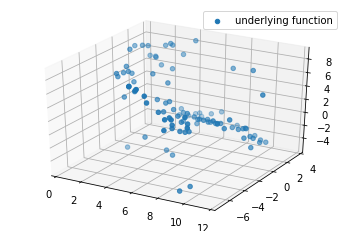

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(x, y, y_pred=None):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

X_embedded = TSNE(n_components=2).fit_transform(x)
y_embedded = TSNE(n_components=1).fit_transform(y_true)

print(X_embedded.shape)
print(y_true.shape)

plot_3d(X_embedded, y_embedded)

## Loss function and Linear layer

In [4]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    # print('gradient shape',self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
   # output = x @ self.weights + self.bias
    output = (x**2) @ self.weights + x @ self.weights + self.bias
    return output

  # x2 + x + 1
  # dy/dx = 2*x*weights_true + weights_true
  # dy/dw = x2 + x
  # dy/db = 1

  def backward(self, gradient):
    # self.weights_gradient = self.x.T @ gradient
    # self.bias_gradient = gradient.sum(axis=0)
    # self.x_gradient = gradient @ self.weights.T
    self.weights_gradient = (np.square(self.x) + self.x).T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T

    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

## Relu Layer

In [5]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient

## Defining model

********************
(100, 2)
********************
********************
4071.151802320293
********************


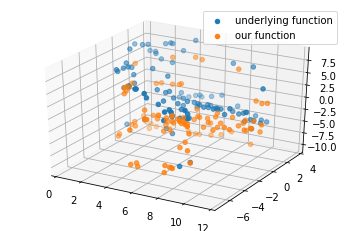

In [6]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, 6)
    self.relu = Relu()
    self.linear2 = Linear(6, 4)
    self.relu2 = Relu()
    self.linear3 = Linear(4, 2)

  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3
  
  def backward(self, output_gradient):

    linear3_gradient = self.linear3.backward(output_gradient)
    relu_gradient = self.relu2.backward(linear3_gradient)

    linear2_gradient = self.linear2.backward(relu_gradient)
    relu2_gradient = self.relu.backward(linear2_gradient)

    linear1_gradient = self.linear1.backward(relu2_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    return linear3_gradient

  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(3, 1)
y_pred = model(x)
print("********************")
print(y_pred.shape)
print("********************")
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print("********************")
print(loss_value)
print("********************")
model.backward(loss_gradient)
y_pred_embedded = TSNE(n_components=1).fit_transform(y_pred)

plot_3d(X_embedded, y_embedded,y_pred_embedded)

## Training function

In [7]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print("********************")
    print(f'Epoch {epoch}, loss {loss_value}')
    print("********************")
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

********************
Epoch 0, loss 4071.151802320293
********************
********************
Epoch 1, loss 2.283372460285065
********************
********************
Epoch 2, loss 1.8255701670334543
********************
********************
Epoch 3, loss 1.6089588282459693
********************
********************
Epoch 4, loss 1.4695200601404
********************
********************
Epoch 5, loss 1.3654984059620006
********************
********************
Epoch 6, loss 1.2819507107989583
********************
********************
Epoch 7, loss 1.2104599385206098
********************
********************
Epoch 8, loss 1.1501816268748164
********************
********************
Epoch 9, loss 1.0979050540228819
********************
********************
Epoch 10, loss 1.050953785982134
********************
********************
Epoch 11, loss 1.0086801218817427
********************
********************
Epoch 12, loss 0.9708408115692652
********************
********************
Epoch 1

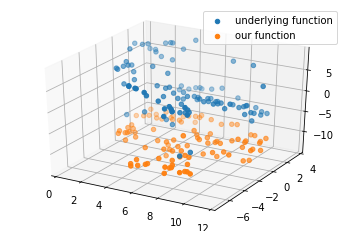

In [8]:
fit(x, y_true, model=model, loss=loss, lr=0.02, num_epochs=70)
y_pred= model(x)
y_pred_embedded = TSNE(n_components=1).fit_transform(y_pred)
plot_3d(X_embedded, y_embedded,y_pred_embedded)